## An치lisis - Ligue 1 temporada 2015/2016 (masculina)

Vamos a hacer un an치lisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que caracter칤sticas son m치s importantes a la hora de tomar la decisi칩n por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuesti칩n, vamos a analizar la Ligue 1 en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competici칩n para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Ligue 1"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Ligue1 = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Ligue 1(2015_2016_male)_reduced.csv


In [2]:
matches_in_Ligue1.head(5)

match_id  shots_on_target_ratio_home  shots_on_target_ratio_away  \
0   3829421                    0.333333                    0.166667   
1   3829420                    0.307692                    0.428571   
2   3829413                    0.166667                    0.333333   
3   3829416                    0.333333                    0.352941   
4   3829422                    0.227273                    0.500000   

   average_shots_on_target_distance_home  \
0                              25.129294   
1                              20.107446   
2                              21.737917   
3                              12.209684   
4                              20.112628   

   average_shots_on_target_distance_away  shots_inside_area_ratio_home  \
0                              12.803802                      0.555556   
1                              19.128651                      0.230769   
2                              19.467647                      0.333333   
3                              15.420536                      0.666667   
4                              20.723704                      0.500000   

   shots_inside_area_ratio_away  pass_success_ratio_home  \
0                      0.583333                 0.763676   
1                      0.714286                 0.747412   
2                      0.833333                 0.798755   
3                      0.764706                 0.741688   
4                      0.500000                 0.876560   

   pass_success_ratio_away  cross_success_ratio_home  ...  \
0                 0.809074                  0.307692  ...   
1                 0.783058                  0.500000  ...   
2                 0.829213                  0.200000  ...   
3                 0.810964                  0.250000  ...   
4                 0.786082                  0.142857  ...   

   percentage_shots_under_pressure_home  \
0                              0.333333   
1                              0.375000   
2                              0.000000   
3                              0.250000   
4                              0.444444   

   percentage_shots_inside_area_under_pressure_home  \
0                                          0.333333   
1                                          0.166667   
2                                          0.000000   
3                                          0.285714   
4                                          0.600000   

   percentage_passes_under_pressure_home  \
0                               0.566265   
1                               0.565217   
2                               0.520000   
3                               0.514085   
4                               0.684564   

   percentage_passes_inside_area_under_pressure_home  \
0                                                1.0   
1                                                0.5   
2                                                0.0   
3                                                0.0   
4                                                1.0   

   percentage_set_piece_shots_home  \
0                         0.555556   
1                         0.500000   
2                         0.666667   
3                         0.384615   
4                         0.875000   

   percentage_set_piece_shots_inside_area_home  percentage_substitutions_home  \
0                                     0.666667                            0.5   
1                                     0.222222                            0.5   
2                                     0.500000                            0.5   
3                                     0.333333                            0.5   
4                                     0.875000                            0.5   

   percentage_tactical_substitutions_home  percentage_tactical_changes_home  \
0                                    0.50                          0.750000   
1                                    0.40                          0.444

Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentaci칩n) y mostramos sus resultados.

In [3]:
from src.analysis import ligue1_best_model

best_model_Ligue1, evaluation_metrics, X_train_Ligue1, X_test_Ligue1, encoder_Ligue1, match_ids_test = ligue1_best_model(matches_in_Ligue1)
print(f"The best model for Ligue 1 is {best_model_Ligue1}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Ligue 1 is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, n_estimators=60, random_state=42)
The evaluation metrics for the best model are:


Train Accuracy  Test Accuracy  Precision Macro  \
Random Forest        0.774086       0.618421         0.591787   

               Precision Weighted  Recall Macro  Recall Weighted  F1 Macro  \
Random Forest             0.60164      0.589015         0.618421  0.581168   

               F1 Weighted  
Random Forest     0.601067

Una vez ya tenemos el mejor modelo entrenado comenzamos el an치lisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las caracter칤sticas proporcionada por el modelo a trav칠s del m칠todo `feature_importances_`.
- A diferencia de la regresi칩n log칤stica, que asigna coeficientes espec칤ficos a cada clase, Random Forest eval칰a la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre m칰ltiples factores y su impacto en la predicci칩n del resultado.
- Sin embargo, no indica la direcci칩n del efecto de cada caracter칤stica (positiva o negativa), sino 칰nicamente su importancia relativa en el rendimiento del modelo.

El gr치fico presentado a continuaci칩n muestra la importancia global de cada caracter칤stica en la predicci칩n de los resultados de los partidos en la Ligue 1.
- Valores m치s altos indican que una caracter칤stica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la caracter칤stica no aporta informaci칩n significativa para la clasificaci칩n del resultado.

Este an치lisis nos permite identificar qu칠 factores son clave en la predicci칩n del resultado de los partidos, considerando relaciones m치s complejas y capturando patrones que un modelo lineal no podr칤a detectar.

Features with zero importance across all classes:
['tackles_success_ratio_home', 'dribbles_success_ratio_away', 'possession_percentage_home', 'last_3_matches_form_home', 'is_valid_last_3_matches_form_home', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'is_valid_win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'goals_conceded_last_match_home', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'percentage_shots_other_home', 'percentage_corners_home', 'percentage_recoveries_home', 'percentage_tackles_home', 'percentage_penaltys_committed_home', 'percentage_key_errors_home',

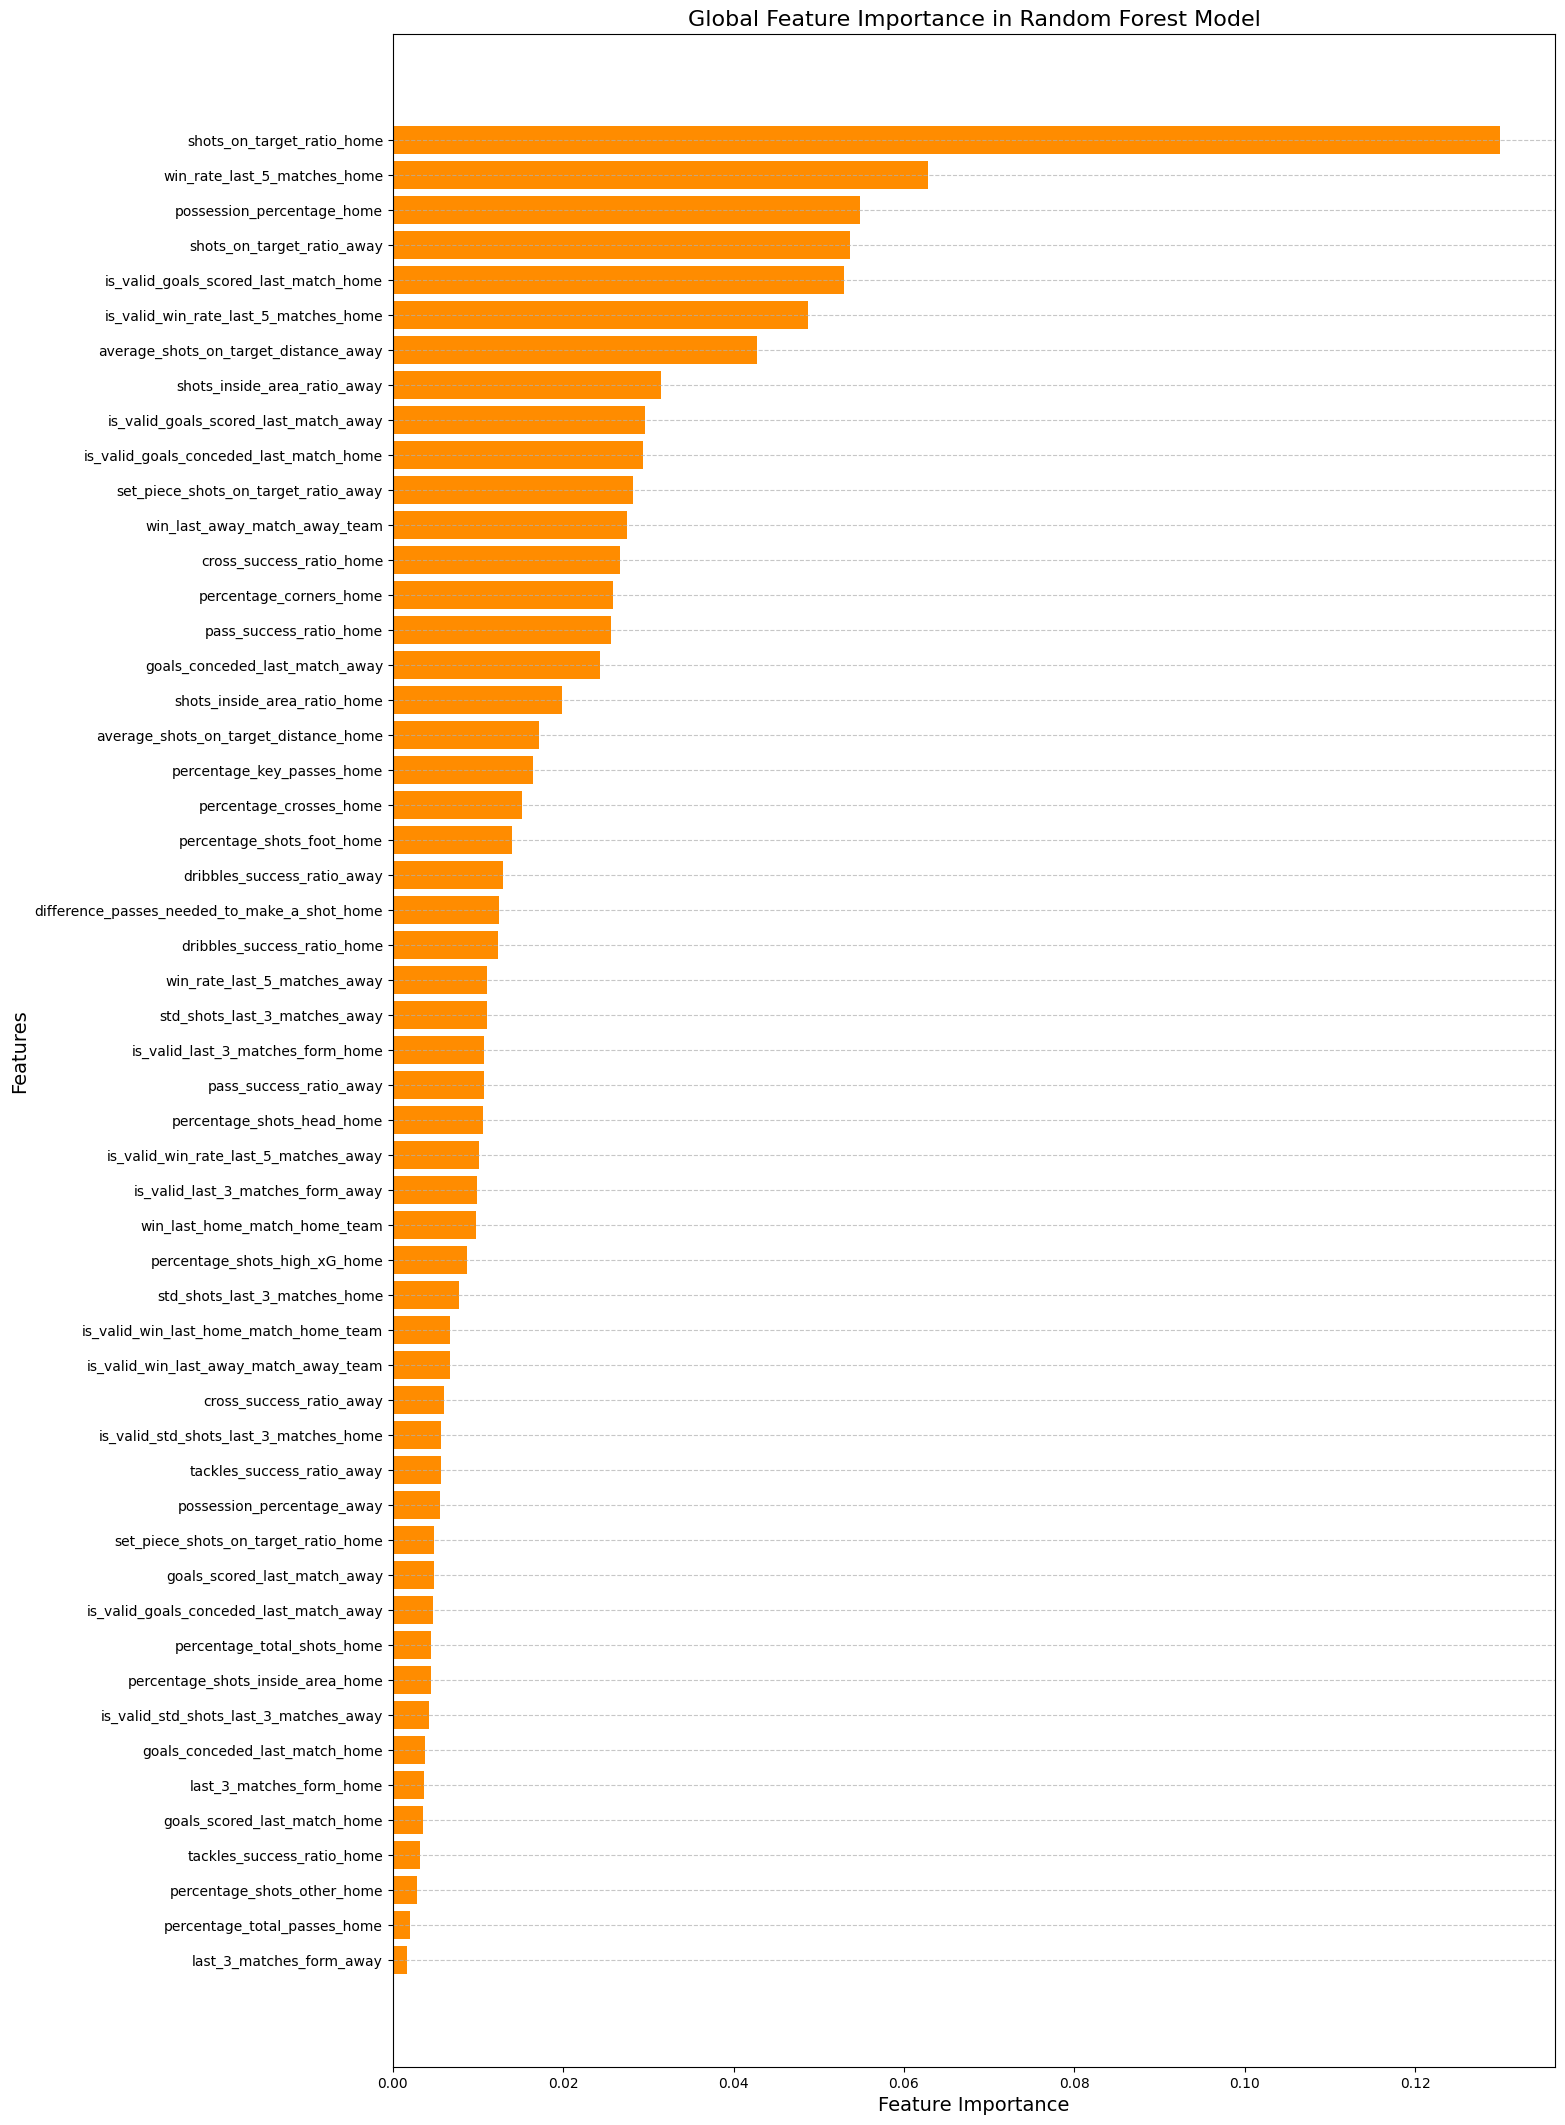

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Ligue1)

El modelo Random Forest ha determinado la relevancia de cada caracter칤stica en la predicci칩n del resultado de los partidos en la Ligue 1. A diferencia de la Regresi칩n Log칤stica, aqu칤 se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases espec칤ficas (victoria local, empate o victoria visitante). Vamos a analizar el gr치fico:

- **Caracter칤siticas m치s importantes en la predicci칩n**: Las caracter칤sticas con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificaci칩n del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, s칤 podemos intuir que estas caracter칤sticas han sido relevantes en la toma de decisiones del modelo.
    - `shots_on_target_ratio_home`: El porcentaje de tiros a puerta del equipo local es la variable m치s influyente en el modelo. Esto sugiere que la precisi칩n en los disparos es un aspecto clave para el resultado final del partido.
    - `win_rate_last_5_matches_home`: El rendimiento reciente del equipo local ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los 칰ltimos encuentros han tenido una relaci칩n con el desenlace de los partidos en la competici칩n.
    - `possession_percentage_away`: El porcentaje de posesi칩n del equipo visitante ha sido una de las m칠tricas con m치s peso. Aunque no podemos afirmar si m치s posesi칩n se traduce en mejores resultados, s칤 podemos intuir que el control del bal칩n est치 vinculado a ciertos patrones que el modelo ha identificado como influyentes.
    - `shots_on_target_ratio_away`: Al igual que ocurre con el equipo local, el porcentaje de tiros a puerta del equipo visitante es una caracter칤stica importante. Esto refuerza la idea de que la generaci칩n de oportunidades y la precisi칩n en los disparos tienen un papel determinante en el resultado del partido.
    - `is_valid_goals_scored_last_match_home`, `is_valid_goals_scored_last_match_away` y `is_valid_goals_conceded_last_match_home`: La variable que indica si los goles anotados/encajados en el 칰ltimo partido de los equipos fueron v치lidos (si tienen un significado v치lido porque ha habido un partido anterior de ese equipo) tambi칠n ha sido considerada importante. Esto sugiere que el modelo ha encontrado una relaci칩n entre el desempe침o ofensivo reciente, el desempe침o defensivo reciente y los resultados de los partidos analizados.
    - `is_valid_win_rate_last_5_matches_home`: La varibale que indica si se pueden considerar el porcentaje de victoria del equipo local en los 칰ltimos cinco partidos se considera como importante. Esto sugiere que la forma en la que llega el equipo local tiene importancia en el resultado.
    - `average_shots_on_target_distance_away` y `average_shots_on_target_distance_home`: La distancia media de los tiros a puerta del equipo visitante y local cobran tambi칠n importancia en la predicci칩n del resultado del partido.
    - `shots_inside_area_ratio_away` y `shots_inside_area_ratio_home`: La frecuencia con la que los equipos logran disparar dentro del 치rea tambi칠n es una m칠trica con un peso relevante. Dado que los tiros dentro del 치rea suelen tener una mayor probabilidad de acabar en gol, su importancia dentro del modelo es comprensible.
    - `set_piece_shots_on_target_ratio_away`: La precisi칩n en jugadas a bal칩n parado del equipo visitante tambi칠n ha sido destacada por el modelo. Esto podr칤a indicar que las acciones de estrategia como c칩rners o tiros libres han tenido un peso en la predicci칩n de los partidos.
    - `win_last_away_match_away_team`: Que el equipo visitante haya ganado o no su 칰ltimo partido fuera de casa influye tambi칠n en el resultado. Con esto podemos deducir que la forma en su 칰ltimo partido en el que se encuentra en la misma situaci칩n (juega tambi칠n fuera de casa) influye en el resultado.
    - `cross_success_ratio_home`, `pass_success_ratio_home` y `percentage_key_passes_home`: La efectividad en los centros, pases y los pases clave del equipo local han sido consideradas m칠tricas relevantes. Esto sugiere que la calidad en la generaci칩n de jugadas de ataque es un aspecto que el modelo ha relacionado con los resultados de los partidos.
    - `difference_passes_needed_to_make_a_shot`: El estilo de juego en el partido de los equipos va a influir en el resultado. Veremos m치s adelante si favorece m치s a la victoria los equipos verticales (necesitan menos pases para realizar disparos) o los equipo m치s conservadores y que le dan mucha relevancia al control del juego (necesitan m치s pases para realizar disparos).

- **Caracter칤sticas sin importancia en la predicci칩n**: El modelo ha determinado que varias caracter칤sticas no aportan informaci칩n relevante en la clasificaci칩n del resultado del partido. Esto no significa que estas variables no tengan influencia en el f칰tbol en la Ligue 1, sino que, dentro de los datos analizados, el modelo no ha encontrado una relaci칩n clara con los resultados.
    - **Factores relacionados con el rendimiento reciente**:  Variables como `last_3_matches_form_home`, `last_3_matches_form_away`, `win_last_home_match_home_team` y `win_last_away_match_away_team` no han sido consideradas relevantes. Esto sugiere que, aunque el rendimiento reciente pueda ser un indicador del estado de forma de un equipo, los resultados individuales m치s cercanos no han sido determinantes en la predicci칩n del modelo.
    - **Estad칤sticas defensivas y disciplinares**: 
        - Curiosamente, m칠tricas como `tackles_success_ratio_home`, `percentage_tackles_home` y `percentage_recoveries_defensive_third_home` no han tenido importancia en el modelo. Esto podr칤a indicar que el rendimiento defensivo es m치s dif칤cil de modelar en t칠rminos de predicci칩n de resultados, ya que su impacto puede depender de m칰ltiples factores externos.
        - Otras m칠tricas descartadas incluyen las tarjetas rojas (`percentage_red_cards_home`), las faltas cometidas (`percentage_penaltys_committed_home`) y los errores clave (`percentage_key_errors_home`). Su falta de relevancia sugiere que, aunque estos eventos pueden influir en ciertos partidos individuales, no han mostrado un patr칩n consistente en los datos analizados.
    - **M칠tricas ofensivas**: Es curioso como m칠tricas ofensivas tan importantes como `percentage_shots_high_xG_home` tengan una importancia tan reducida a la hora de predecir el resultado.
    - **Otros factores t치cticos y de juego**: El modelo tambi칠n ha descartado estad칤sticas como `percentage_counterattacks_home` y `percentage_substitutions_home`. Esto podr칤a indicar que la cantidad de veces que un equipo realiza estas acciones no tiene una relaci칩n clara con el desenlace del partido, o que su impacto depende de otros factores no considerados en el modelo.

**Conclusiones generales**: 

El modelo de Random Forest ha identificado que las m칠tricas m치s relevantes para predecir el resultado de los partidos en la Ligue 1 est치n relacionadas con la eficiencia ofensiva y la generaci칩n de oportunidades de gol. Factores como la precisi칩n en los tiros a puerta, la capacidad de generar disparos dentro del 치rea y la posesi칩n del bal칩n han sido claves en la predicci칩n del modelo.

Por otro lado, el modelo ha descartado m칠tricas relacionadas con la defensa, la recuperaci칩n del bal칩n y el rendimiento en los 칰ltimos partidos individuales, lo que sugiere que estos factores no han mostrado una relaci칩n clara con los resultados analizados. La falta de importancia de variables como los tackles, las recuperaciones y las tarjetas rojas indica que estos aspectos pueden no ser determinantes en la predicci칩n del resultado final.

Es importante destacar que, aunque ciertas m칠tricas han sido identificadas como m치s relevantes que otras, el modelo no nos indica en qu칠 direcci칩n afectan al resultado, solo que han sido utilizadas con mayor peso en la clasificaci칩n. Esto significa que, por ejemplo, una mayor posesi칩n o un mayor n칰mero de tiros a puerta pueden estar correlacionados con el resultado, pero no podemos determinar si su aumento favorece a un equipo o simplemente es una caracter칤stica com칰n en los datos analizados.

En t칠rminos t치cticos, podemos intuir que los equipos que logran generar oportunidades claras, tienen precisi칩n en sus disparos y mantienen la posesi칩n son los que tienen m치s probabilidades de obtener resultados favorables. Adem치s, la importancia de las jugadas a bal칩n parado sugiere que estas situaciones han jugado un papel clave en los desenlaces de los partidos.

En conclusi칩n, la Ligue 1 parece estar influenciada en gran medida por el rendimiento ofensivo y la capacidad de generar ocasiones de gol. Aunque el modelo no nos dice exactamente c칩mo influyen estas caracter칤sticas en cada partido, s칤 nos permite entender qu칠 factores han sido m치s utilizados para la predicci칩n del resultado. Esto aporta informaci칩n valiosa para el an치lisis de los partidos del f칰tbol franc칠s.

### Estudio local

Ahora comenzamos el an치lisis de explicabilidad utilizando SHAP. 

El an치lisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada caracter칤stica en la predicci칩n del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicci칩n. En este documento analizaremos los resultados obtenidos para la predicci칩n de los partidos de la Ligue 1.

Cada uno de los siguientes gr치ficos representa la importancia de las variables en la predicci칩n de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretaci칩n de los gr치ficos SHAP**: Cada punto en el gr치fico representa un partido. Los valores en el eje X indican el impacto de una caracter칤stica espec칤fica en la predicci칩n del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la caracter칤stica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

feature_names_list_Ligue1 = list(best_model_Ligue1.feature_names_in_)
shap_values_Ligue1 = compute_shap_values(best_model_Ligue1, X_train_Ligue1, X_test_Ligue1, feature_names_list_Ligue1)

Class 0: away_team
Important features (35):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'goals_scored_last_match_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'percentage_counterpress_home', 'percentage_dispossessed_home', 'p

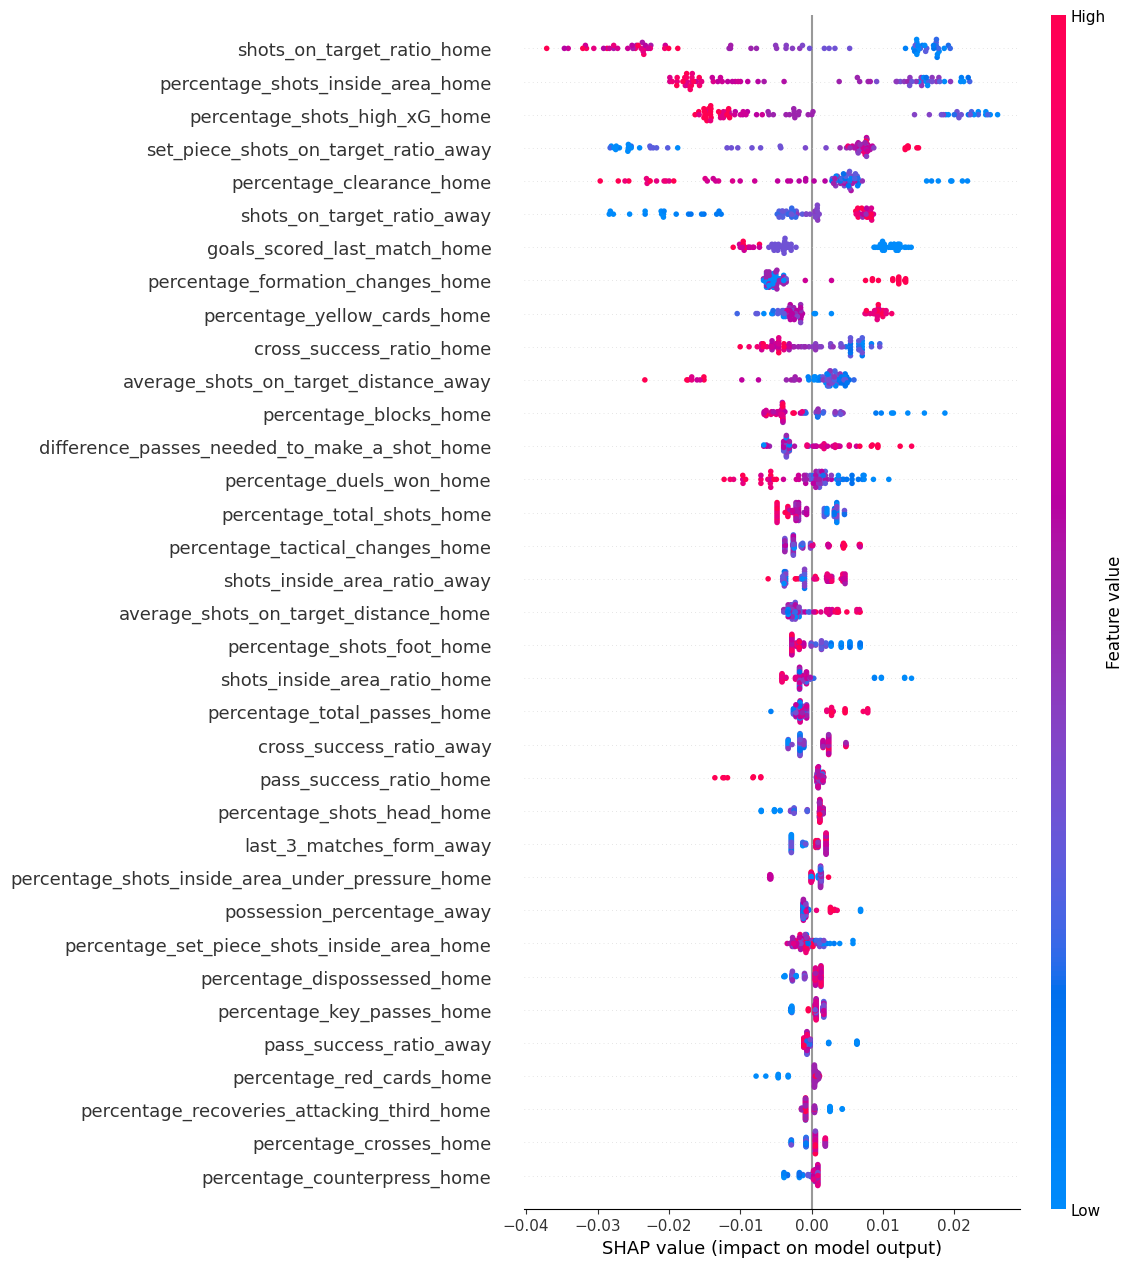

Class 1: draw
Important features (31):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_pressures_home', 'percentage_counterpress_home', 'percentage_dribbles_home', 'percentage_recoveries_attacking_third_home', 'percentage_passes_under_pressure_home', 'percentage_set_piece_shots_inside_area_home', 'percentage_tactical_substitutions_home

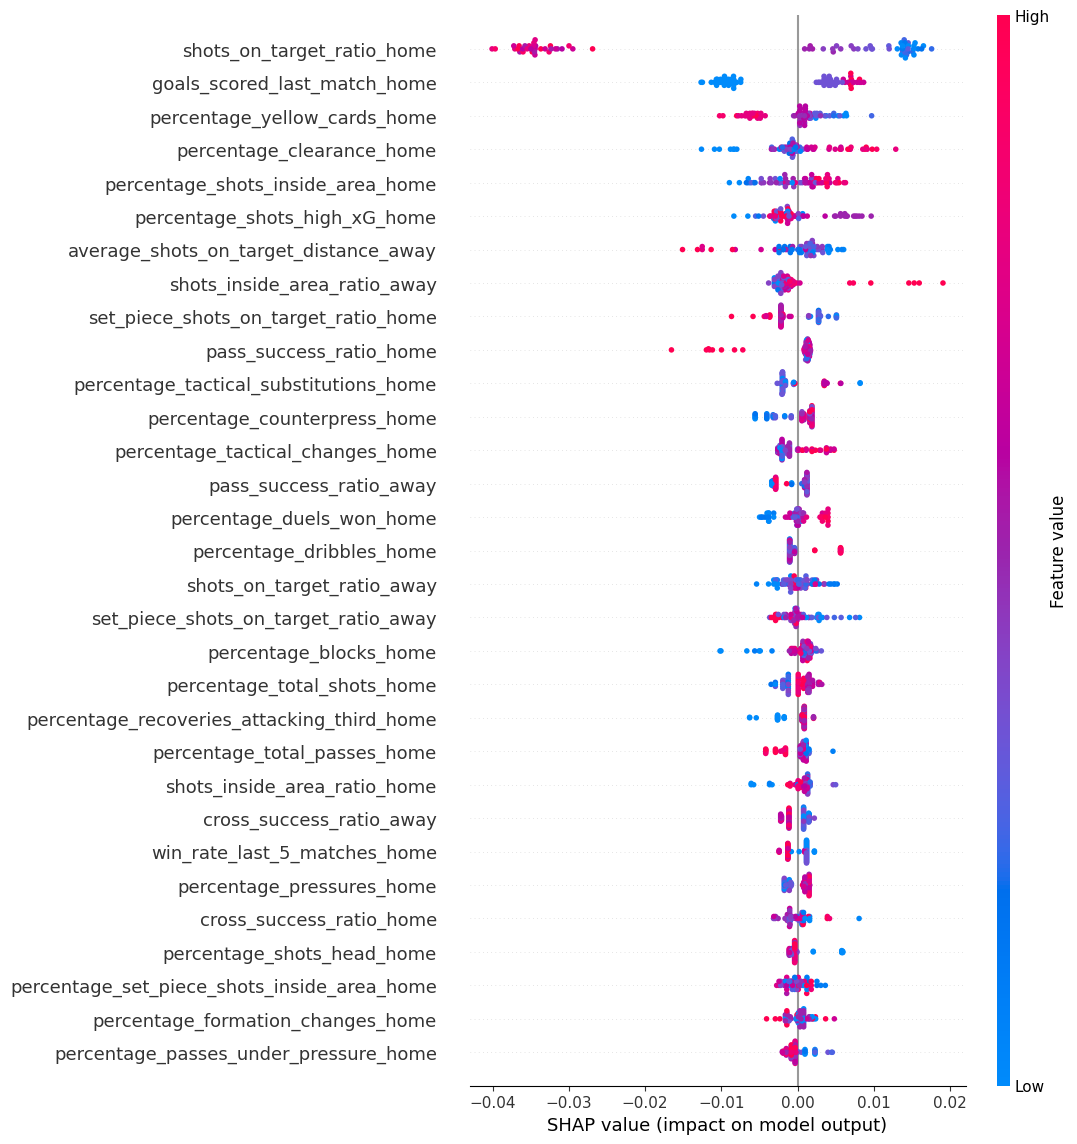

Class 2: home_team
Important features (38):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_home', 'cross_success_ratio_away', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'std_shots_last_3_matches_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_clearance_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'percentage_pressures_home', 'percentage_counterpr

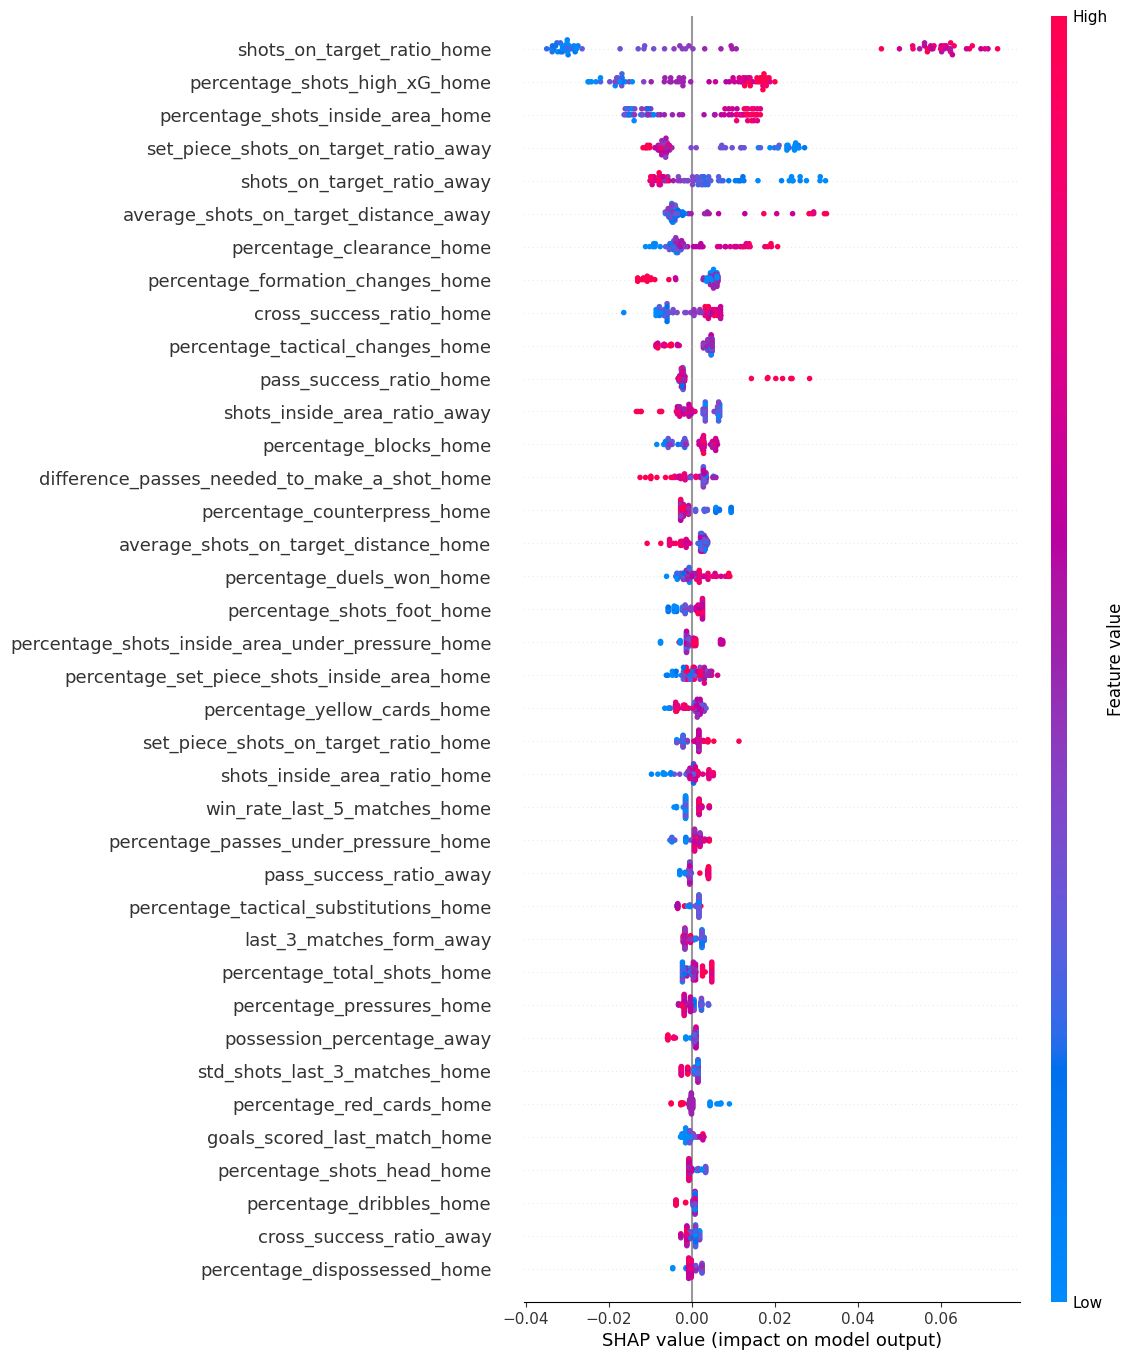

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_Ligue1, feature_names_list_Ligue1, encoder_Ligue1, threshold=0.001)

Vamos a analizar cada uno de los gr치ficos:

- **Victoria del equipo visitante**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Ligue 1.
    - **Caracter칤sticas que favorecen la victoria del equipo visitante**: 游늳
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta es m치s eficiente en ataque, lo que aumenta sus probabilidades de marcar y ganar el partido.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene precisi칩n en jugadas a bal칩n parado, puede aprovechar estas oportunidades para anotar goles clave.
        - `percentage_formation_changes_home`: Si el equipo local hace m치s cambios de formaci칩n que el equipo visitante eso significa que el equipo local esta vi칠ndose superado lo que indica que el equipo visitante tiene m치s opciones de llavarse el partido.
        - `percentage_yellow_cards_home`: Si el equipo local recibe m치s tarjetas amarillas que el equipo visitante, eso significa que tiene m치s opciones de recibir una tarjeta roja y que deben andarse con m치s cuidado.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases que el equipo visitante para realizar un tiro significa que el juego del equipo visitante es un juego m치s directo y efectivo lo que parece favorecer al equipo visitante.
        - `percentage_tactical_changes_home`: Un equipo local que necesita hacer muchos cambios t치cticos puede estar teniendo dificultades en el partido, lo que favorece al equipo visitante.
        - `shots_inside_area_ratio_away`: Si un alto porcentaje de los tiros que ha hecho el equipo visitante han sido desde dentro del 치rea aumentan las opciones de que gane el equipo visitante ya que son tiros normalmente m치s peligrosos.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza tiros desde distancias m치s lejanas, disminuye la calidad de sus ocasiones y su posibilidad de marcar, lo que hace que aumenten las opciones de que el equipo visitante gane el partido.
        - `percentage_dispossessed_home`: Un equipo local que pierde el bal칩n con frecuencia facilita oportunidades de contraataque para el equipo visitante.
    - **Caracter칤sticas que no favorecen la victoria del equipo visitante**: 游늴
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera peligro y reduce las posibilidades de que el equipo visitante gane.
        - `percentage_shots_inside_area_home`: Un equipo local que dispara mucho desde dentro del 치rea genera m치s peligro y puede hacer m치s dif칤cil la victoria visitante.
        - `percentage_shots_high_xG_home`: Un equipo local que genera disparos con alta expectativa de gol (xG) es m치s probable que convierta sus oportunidades, dificultando la victoria visitante.
        - `percentage_clearance_home`: Un equipo local con m치s despejes en el partido que el equipo visitante puede reflejar que el equipo local se esta defendiendo bien lo que hace dif칤cil la victoria del equipo visitante.
        - `goals_scored_last_match_home`: Si el equipo local viene de anotar varios goles en su 칰ltimo partido, puede llegar con confianza y efectividad, complicando el triunfo visitante.
        - `cross_success_ratio_home`: Un equipo local con un alto porcentaje de precisi칩n en centros puede hacer ver que est치n creando ocasiones de gol lo que hace que disminuyan las opciones del equipo visitante de ganar el partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, est치 reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `percentage_duels_won_home`: Si el equipo local gana m치s duelos que el equipo visitante esto puede significar que est치n siendo m치s intensos en el aspecto f칤sico del partido.
        - `percentage_total_shots_home`: Si el equipo local realiza m치s tiros que el equipo visitante, aumentan sus opciones de ganar el partido por el simple hecho de haber intentado marcar m치s veces.
        - `shots_inside_area_ratio_home_`: Si un alto porcentaje de los tiros que ha hecho el equipo local han sido desde dentro del 치rea aumentan las opciones de que gane el equipo local ya que son tiros normalmente m치s peligrosos.
    - **Conclusi칩n**: La victoria del equipo visitante en la Ligue 1 est치 determinada por su efectividad en ataque, la capacidad de aprovechar los errores del equipo local y su superioridad t치ctica. Factores clave como un alto porcentaje de tiros a puerta, la precisi칩n en jugadas a bal칩n parado y la generaci칩n de tiros dentro del 치rea aumentan sus probabilidades de 칠xito. Adem치s, un equipo visitante que juega de manera m치s directa y efectiva, con menos necesidad de pases para generar un disparo, tiene m치s opciones de imponerse en el partido. Por otro lado, si el equipo local tiene una alta efectividad en sus tiros, genera ocasiones con alta expectativa de gol (xG) y domina en duelos f칤sicos, la victoria visitante se vuelve m치s complicada. Asimismo, un equipo local que bloquea tiros, despeja bien y mantiene un alto porcentaje de precisi칩n en centros puede reducir significativamente las opciones de que el visitante se lleve el partido.

- **Empate**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de empate en un partido en la Ligue 1. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Caracter칤sticas que favorecen el empate**: 游늳
        - `percentage_clearance_home`: Si el equipo local realiza muchos despejes en el partido puede indicar que ha sido complicado anotarle un gol, consiguiendo de esta manera que aumenten las opciones de que se de un empate.
        - `goals_scored_last_match_home`: Si el equipo local no ha anotado goles en su 칰ltimo partido puede indicar que viene en mala forma y que tiene complicado conseguir un empate, sin embargo, si viene de anotar alg칰n tanto en el partido aunque sea sabemos que no viene en mala forma y que podr칤a darse un empate.
        - `percentage_counterpress_home`: Un equipo local que presiona alto puede generar un partido trabado y con menos transiciones claras, favoreciendo un empate.
        - `percentage_tactical_changes_home`: Si el equipo local realiza cambios t치cticos en un intento por controlar el partido sin volcarse al ataque, esto puede mantener el marcador parejo.
        - `percentage_duels_won_home`: Si el equipo local gana muchos duelos, el partido se vuelve m치s trabado y menos fluido, lo que favorece un marcador cerrado.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, est치 reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar, lo que favorece a un marcador m치s cerrado.
        - `shots_inside_area_ratio_home` y `shots_inside_area_ratio_away`: Si ambos equipos generan tiros dentro del 치rea sin convertir goles, el partido puede mantenerse igualado hasta el final.
    - **Caracter칤sticas que no favorecen el empate**: 游늴
        - `shots_on_target_ratio_home`: Si el equipo local tiene una alta precisi칩n en sus tiros a puerta, aumenta la posibilidad de marcar y romper el empate.
        - `percentage_yellow_cards_home`: Si el equipo local recibe m치s tarjetas amarillas que el equipo visitante, eso significa que tiene m치s opciones de recibir una tarjeta roja y que deben andarse con m치s cuidado. Adem치s puede ser sintoma de la frustraci칩n del equipo local tras estar viendose superado en el partido.
        - `percentage_shots_high_xG_home`: Si el equipo local genera oportunidades con alta expectativa de gol (xG), es m치s probable que convierta y rompa la igualdad.
        - `average_shots_on_target_distance_away`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `cross_success_ratio_home` y `cross_success_ratio_away`: Si uno de los equipos tiene una alta precisi칩n en los centros, puede generar m치s peligro y romper el equilibrio del partido.
        - `win_rate_last_5_matches_home`: Si el equipo local ha tenido un buen rendimiento en los 칰ltimos cinco partidos, es m치s probable que mantenga el impulso y consiga la victoria en lugar de empatar.
        - `percentage_passes_under_pressure_home`: Si el equipo local logra completar pases bajo presi칩n, puede controlar mejor el partido y generar m치s oportunidades de gol.
    - **Conclusi칩n**: El empate en la Ligue 1 suele darse cuando ning칰n equipo logra imponerse con claridad y el partido se mantiene equilibrado en t칠rminos de posesi칩n, duelos f칤sicos y oportunidades de gol. Factores como la solidez defensiva del equipo local, el 칠xito en la presi칩n alta y la cantidad de tiros bloqueados contribuyen a que el marcador se mantenga parejo a lo largo del partido. Sin embargo, el empate se vuelve menos probable cuando uno de los equipos genera m치s oportunidades claras (xG), tiene una alta precisi칩n en sus tiros a puerta y domina en aspectos clave como los centros efectivos y los pases bajo presi칩n. Adem치s, un equipo local que viene con una buena racha en los 칰ltimos cinco partidos es m치s propenso a conseguir una victoria en lugar de empatar.

- **Victoria del equipo local**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de victoria del equipo local en la Ligue 1.
    - **Caracter칤sticas que favorecen la victoria del equipo local**: 游늳
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera m치s peligro y aumenta sus posibilidades de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son m치s peligrosos y pueden traducirse en goles con mayor frecuencia.
        - `percentage_shots_inside_area_home`: Un equipo local que genera muchos tiros dentro del 치rea tiene m치s probabilidades de marcar, ya que estos disparos suelen ser m치s efectivos.
        - `average_shots_on_target_distance_away`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `percentage_clearance_home`: Una defensa efectiva que despeja los balones con 칠xito reduce las oportunidades de gol del equipo visitante y ayuda a mantener la ventaja en el marcador.
        - `cross_success_ratio_home`: Si el equipo local tiene una alta precisi칩n en los centros, puede generar m치s peligro y romper el equilibrio del partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, significa quue esta defendiendo bien.
        - `percentage_duels_won_home`: Ganar m치s duelos en el partido permite al equipo local imponerse f칤sicamente y recuperar la posesi칩n en zonas clave.
        - `percentage_shots_foot_home`: Un alto n칰mero de disparos con el pie indica que el equipo local est치 generando oportunidades m치s claras en comparaci칩n con tiros de cabeza, lo que aumenta la probabilidad de marcar.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local es preciso en jugadas a bal칩n parado, puede aprovechar estas oportunidades para anotar y aumentar sus posibilidades de victoria.
        - `win_rate_last_5_matches_home`: Un equipo local con una buena racha en los 칰ltimos cinco partidos llega en un estado de forma 칩ptimo, aumentando sus probabilidades de ganar.
        - `shots_inside_area_ratio_home`: Si un alto porcentaje de los tiros que ha hecho el equipo local han sido desde dentro del 치rea aumentan las opciones de que gane el equipo local ya que son tiros normalmente m치s peligrosos.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local consigue finalizar jugadas dentro del 치rea a pesar de la presi칩n defensiva, tiene m치s probabilidades de convertir y ganar el partido.
    - **Caracter칤sticas que no favorecen la victoria del equipo local**: 游늴
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante es preciso en jugadas a bal칩n parado, puede generar peligro y reducir las posibilidades de victoria del equipo local.
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, puede generar m치s peligro y reducir las opciones de victoria del equipo local.
        - `percentage_formation_changes_home` y `percentage_tactical_changes_home`: Si el equipo local realiza demasiados cambios de formaci칩n o t치cticos, podr칤a indicar falta de estabilidad t치ctica, lo que puede ser un factor negativo para su rendimiento.
        - `shots_inside_area_ratio_away`: Si un alto porcentaje de los tiros que ha hecho el equipo visitante han sido desde dentro del 치rea aumentan las opciones de que gane el equipo visitante ya que son tiros normalmente m치s peligrosos.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases que el equipo visitante para realizar un tiro significa que el juego del equipo visitante es un juego m치s directo y efectivo lo que parece favorecer al equipo visitante.
        - `average_shots_on_target_distance_home`: Si la distancia media de los tiros del equipo visitante es una distancia elevada, hace que aumenten las probabilidades de que el gane el equipo local.
        - `percentage_red_cards_home`: Un equipo local que recibe tarjetas rojas podr칤a quedarse con menos jugadores, debilitando su estructura defensiva y complicando sus opciones de victoria.
    - **Conclusi칩n**: La victoria del equipo local en la Ligue 1 est치 influenciada principalmente por su efectividad ofensiva, solidez defensiva y control del partido. Un equipo que genera muchas oportunidades de gol dentro del 치rea, mantiene una alta precisi칩n en los tiros a puerta y domina en los duelos f칤sicos tiene mayores probabilidades de imponerse en el marcador. Adem치s, su capacidad para ejecutar jugadas a bal칩n parado con precisi칩n, realizar despejes efectivos y bloquear tiros rivales refuerza su solidez y dificulta el ataque del equipo visitante. Por otro lado, la victoria local se complica si el equipo visitante logra generar tiros peligrosos desde dentro del 치rea, tiene una alta precisi칩n en jugadas a bal칩n parado y muestra un estilo de juego m치s directo y efectivo. Adem치s, factores como la falta de estabilidad t치ctica, la acumulaci칩n de tarjetas rojas y la dependencia de tiros desde larga distancia pueden debilitar al equipo local y darle ventaja al equipo visitante.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: La victoria del equipo visitante en la Ligue 1 se ve favorecida cuando el equipo logra ser efectivo en ataque, tiene un juego directo y aprovecha los errores del equipo local. Un alto porcentaje de tiros a puerta y precisi칩n en jugadas a bal칩n parado aumentan considerablemente sus posibilidades de 칠xito. Adem치s, si el equipo local muestra inestabilidad t치ctica, con constantes cambios de formaci칩n o un juego poco efectivo que requiera muchos pases para generar oportunidades, el visitante se beneficia. Sin embargo, si el equipo local es s칩lido en defensa, con una alta efectividad en sus disparos y un dominio en los duelos f칤sicos, la victoria del visitante se vuelve m치s complicada.
    - *Empate*: El empate en la Ligue 1 se produce cuando ambos equipos se neutralizan mutuamente en ataque y defensa, resultando en un partido cerrado. Equipos que destacan por su solidez defensiva, con muchos despejes y bloqueos de tiros, tienen m치s posibilidades de mantener el marcador parejo. Asimismo, una presi칩n alta efectiva y una gran cantidad de duelos ganados pueden hacer que el partido sea trabado, sin un claro dominador. Sin embargo, el empate se vuelve menos probable cuando uno de los equipos es m치s preciso en sus tiros a puerta, genera oportunidades con alta expectativa de gol (xG) y domina en aspectos clave como los centros y los pases bajo presi칩n. Un equipo con un buen rendimiento reciente tambi칠n es menos propenso a conformarse con el empate y buscar치 la victoria.
    - *Victoria del equipo local*: La victoria del equipo local est치 determinada por su capacidad para generar peligro en el 치rea rival, mantener una defensa s칩lida y controlar el ritmo del partido. Un alto porcentaje de tiros a puerta, la efectividad en jugadas a bal칩n parado y la capacidad para ganar duelos f칤sicos le dan al equipo local una ventaja significativa. Adem치s, si el equipo visitante recurre a tiros lejanos o no tiene precisi칩n en su ataque, el equipo local se favorece a칰n m치s. Sin embargo, la victoria local se complica si el equipo visitante tiene un alto porcentaje de tiros a puerta, es preciso en jugadas a bal칩n parado y consigue generar peligro desde dentro del 치rea. Factores como la inestabilidad t치ctica, la acumulaci칩n de tarjetas rojas o la dificultad del equipo local para mantener la posesi칩n bajo presi칩n tambi칠n pueden reducir sus posibilidades de 칠xito.
    - *Factores no determinantes*: Algunos factores no parecen determinantes en el resultado de los partidos en la Ligue 1. Por ejemplo, el n칰mero total de pases realizados por un equipo no es un indicador claro de victoria, ya que la posesi칩n por s칤 sola no garantiza generar oportunidades de gol efectivas. Asimismo, la cantidad de faltas cometidas no parece tener un impacto significativo a menos que resulten en tarjetas rojas o penaltis. Algunos cambios t치cticos pueden reflejar problemas en el equipo, pero no siempre afectan directamente el resultado final. Adem치s, aunque las estad칤sticas defensivas como despejes y bloqueos son importantes para mantener un marcador cerrado, por s칤 solas no determinan qui칠n ganar치 el partido.